<a href="https://colab.research.google.com/github/BeverlyHuang/EDA-on-NBA-Team-Valuation/blob/master/NBA_Team_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA on NBA Team Valuation



### Import Data

In [0]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
attendance_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_attendance.csv");attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


In [0]:
endorsement_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_endorsements.csv");endorsement_df.head()
endorsement_df = endorsement_df[['TEAM', 'SALARY_MILLIONS', 'ENDORSEMENT_MILLIONS']].groupby(['TEAM'], as_index=False).mean()
endorsement_df

,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,Chicago Bulls,23.0,13.0
1,Cleveland Cavaliers,24.5,34.0
2,Golden State Warriors,19.5,35.5
3,Houston Rockets,27.0,20.0
4,Los Angeles Clippers,23.0,8.0
5,New York Knicks,23.0,11.0
6,Oklahoma City Thunder,27.0,15.0


In [0]:
valuations_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_team_valuations.csv");valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [0]:
elo_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


### Merge Data into one Dataframe

In [0]:
from functools import reduce
dfs = [attendance_df, elo_df, endorsement_df, valuations_df]
df_nba = reduce(lambda left, right: pd.merge(left, right, how='inner', on="TEAM"), dfs)
df_nba.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,ELO,CONF,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,1519,East,23.0,13.0,2500.0
1,Los Angeles Clippers,41,100,0.782609,0.019088,1636,West,23.0,8.0,2000.0
2,Cleveland Cavaliers,41,100,0.843042,0.020562,1545,East,24.5,34.0,1200.0
3,Golden State Warriors,41,100,0.803436,0.019596,1770,West,19.5,35.5,2600.0
4,Oklahoma City Thunder,41,100,0.746323,0.018203,1543,West,27.0,15.0,1025.0


In [0]:
df_nba = df_nba.drop(['GMS','PCT','CONF'], axis=1)
df_nba.head()

,TEAM,TOTAL_MILLIONS,AVG_MILLIONS,ELO,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,0.888882,0.021680,1519,23.0,13.0,2500.0
1,Los Angeles Clippers,0.782609,0.019088,1636,23.0,8.0,2000.0
2,Cleveland Cavaliers,0.843042,0.020562,1545,24.5,34.0,1200.0
3,Golden State Warriors,0.803436,0.019596,1770,19.5,35.5,2600.0
4,Oklahoma City Thunder,0.746323,0.018203,1543,27.0,15.0,1025.0


###Exploratory Data Analysis (EDA)


####Use Correlation Heatmap to Explore Correlation between Variables

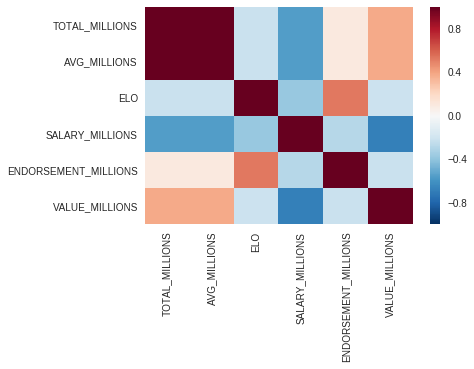

In [0]:
corr = df_nba.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

####Correlation DataFrame Output

In [0]:
corr

,TOTAL_MILLIONS,AVG_MILLIONS,ELO,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,VALUE_MILLIONS
TOTAL_MILLIONS,1.000000,1.000000,-0.220248,-0.558292,0.095669,0.375831
AVG_MILLIONS,1.000000,1.000000,-0.220218,-0.558298,0.095685,0.375801
ELO,-0.220248,-0.220218,1.000000,-0.376185,0.525191,-0.211154
SALARY_MILLIONS,-0.558292,-0.558298,-0.376185,1.000000,-0.288510,-0.686769
ENDORSEMENT_MILLIONS,0.095669,0.095685,0.525191,-0.288510,1.000000,-0.223090
VALUE_MILLIONS,0.375831,0.375801,-0.211154,-0.686769,-0.223090,1.000000


#### Use Linear Regression to Select Significant Variables

In [0]:
results = smf.ols('VALUE_MILLIONS ~TOTAL_MILLIONS+ELO+SALARY_MILLIONS+ENDORSEMENT_MILLIONS', data=df_nba).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3.487
Date:                Mon, 14 Jan 2019   Prob (F-statistic):              0.235
Time:                        18:08:13   Log-Likelihood:                -49.064
No. Observations:                   7   AIC:                             108.1
Df Residuals:                       2   BIC:                             107.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.368e+04 

In [0]:
results = smf.ols('VALUE_MILLIONS ~TOTAL_MILLIONS+ELO+SALARY_MILLIONS', data=df_nba).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     5.814
Date:                Mon, 14 Jan 2019   Prob (F-statistic):             0.0911
Time:                        18:08:17   Log-Likelihood:                -49.614
No. Observations:                   7   AIC:                             107.2
Df Residuals:                       3   BIC:                             107.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.535e+04   7705.563     

In [0]:
nba_pred = df_nba.copy()

In [0]:
nba_pred["predicted"] = results.predict()
nba_pred

,TEAM,TOTAL_MILLIONS,AVG_MILLIONS,ELO,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,VALUE_MILLIONS,predicted
0,Chicago Bulls,0.888882,0.021680,1519,23.0,13.0,2500.0,2035.642128
1,Los Angeles Clippers,0.782609,0.019088,1636,23.0,8.0,2000.0,2108.519258
2,Cleveland Cavaliers,0.843042,0.020562,1545,24.5,34.0,1200.0,1604.445142
3,Golden State Warriors,0.803436,0.019596,1770,19.5,35.5,2600.0,2631.284859
4,Oklahoma City Thunder,0.746323,0.018203,1543,27.0,15.0,1025.0,1267.548259
5,New York Knicks,0.810741,0.019774,1374,23.0,11.0,3300.0,3344.401290
6,Houston Rockets,0.695903,0.016973,1602,27.0,20.0,1650.0,1283.159064


#### Use Seaborn lmplot to Plot Predicted vs Actual Values



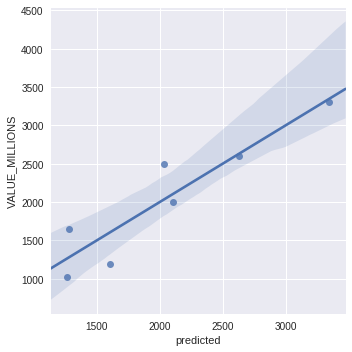

In [0]:
sns.lmplot(x="predicted", y="VALUE_MILLIONS", data=nba_pred)

#### Add Housing Price into Model

In [0]:
val_housing_win_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv");val_housing_win_df.head()
val_housing_win_df = val_housing_win_df[['TEAM','TOTAL_ATTENDANCE_MILLIONS','VALUE_MILLIONS','ELO','MEDIAN_HOME_PRICE_COUNTY_MILLIONS','COUNTY_POPULATION_MILLIONS']]
val_housing_win_df.head()

,TEAM,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
0,Chicago Bulls,0.888882,2500,1519,269900.0,5.20
1,Dallas Mavericks,0.811366,1450,1420,314990.0,2.57
2,Sacramento Kings,0.721928,1075,1393,343950.0,1.51
3,Miami Heat,0.805400,1350,1569,389000.0,2.71
4,Toronto Raptors,0.813050,1125,1600,390000.0,1.10


In [0]:
df_nba = df_nba[['TEAM','SALARY_MILLIONS']].merge(val_housing_win_df, how='inner', on="TEAM")
df_nba.head()

,TEAM,SALARY_MILLIONS,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
0,Chicago Bulls,23.0,0.888882,2500,1519,269900.0,5.20
1,Los Angeles Clippers,23.0,0.782609,2000,1636,625000.0,10.10
2,Cleveland Cavaliers,24.5,0.843042,1200,1545,137500.0,1.26
3,Golden State Warriors,19.5,0.803436,2600,1770,754990.0,1.50
4,Oklahoma City Thunder,27.0,0.746323,1025,1543,209556.5,0.78


####Correlation Heatmap

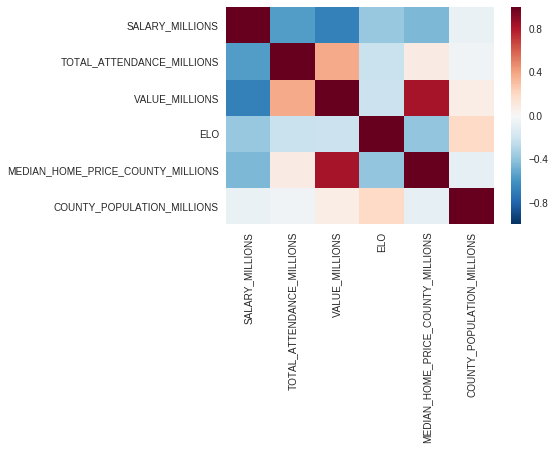

In [0]:
corr = df_nba.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

####Correlation DataFrame Output

In [0]:
corr

,SALARY_MILLIONS,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
SALARY_MILLIONS,1.000000,-0.558292,-0.686769,-0.376185,-0.446912,-0.064376
TOTAL_ATTENDANCE_MILLIONS,-0.558292,1.000000,0.375831,-0.220248,0.080405,-0.040305
VALUE_MILLIONS,-0.686769,0.375831,1.000000,-0.211154,0.828183,0.077663
ELO,-0.376185,-0.220248,-0.211154,1.000000,-0.393855,0.196292
MEDIAN_HOME_PRICE_COUNTY_MILLIONS,-0.446912,0.080405,0.828183,-0.393855,1.000000,-0.092351
COUNTY_POPULATION_MILLIONS,-0.064376,-0.040305,0.077663,0.196292,-0.092351,1.000000


In [0]:
results = smf.ols('VALUE_MILLIONS ~TOTAL_ATTENDANCE_MILLIONS+ELO+SALARY_MILLIONS+MEDIAN_HOME_PRICE_COUNTY_MILLIONS', data=df_nba).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     22.73
Date:                Mon, 14 Jan 2019   Prob (F-statistic):             0.0426
Time:                        18:10:49   Log-Likelihood:                -42.896
No. Observations:                   7   AIC:                             95.79
Df Residuals:                       2   BIC:                             95.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [0]:
nba_pred["predicted"] = results.predict()
nba_pred

,TEAM,TOTAL_MILLIONS,AVG_MILLIONS,ELO,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,VALUE_MILLIONS,predicted
0,Chicago Bulls,0.888882,0.021680,1519,23.0,13.0,2500.0,2413.888114
1,Los Angeles Clippers,0.782609,0.019088,1636,23.0,8.0,2000.0,1779.510605
2,Cleveland Cavaliers,0.843042,0.020562,1545,24.5,34.0,1200.0,1321.861961
3,Golden State Warriors,0.803436,0.019596,1770,19.5,35.5,2600.0,2705.894828
4,Oklahoma City Thunder,0.746323,0.018203,1543,27.0,15.0,1025.0,1079.663239
5,New York Knicks,0.810741,0.019774,1374,23.0,11.0,3300.0,3331.884727
6,Houston Rockets,0.695903,0.016973,1602,27.0,20.0,1650.0,1642.296474


#### Use Seaborn lmplot to Plot Predicted vs Actual Values



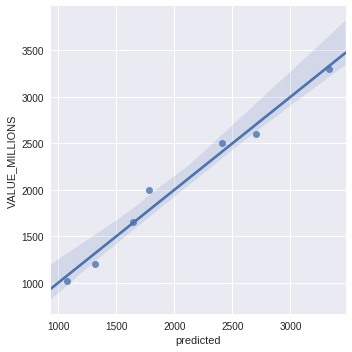

In [0]:
sns.lmplot(x="predicted", y="VALUE_MILLIONS", data=nba_pred)